In [1]:
import torch 
import torchvision 
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/',train = False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

Label: 5


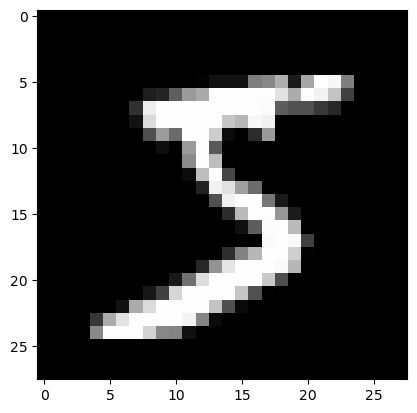

In [7]:
image , label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset = MNIST(root='data/',train=True,transform = transforms.ToTensor())

In [10]:
img_tensor,label = dataset[0]
print(img_tensor.shape , label)

torch.Size([1, 28, 28]) 5


Looking at sample values at tensor

In [11]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


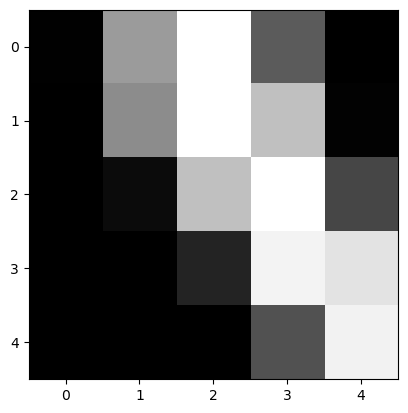

In [12]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

Training a model

In [13]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset , [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds,batch_size,shuffle = True)
val_loader = DataLoader(val_ds,batch_size)

In [15]:
import torch.nn as nn 
 
input_size = 28*28

num_classes = 10

model = nn.Linear(input_size , num_classes)



In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0007,  0.0216, -0.0110,  ..., -0.0049, -0.0180,  0.0248],
        [ 0.0297, -0.0156,  0.0026,  ..., -0.0247,  0.0006, -0.0053],
        [-0.0096,  0.0246,  0.0347,  ...,  0.0177,  0.0285, -0.0207],
        ...,
        [-0.0290,  0.0306, -0.0263,  ...,  0.0279,  0.0086, -0.0339],
        [-0.0262, -0.0041,  0.0190,  ..., -0.0068,  0.0182,  0.0173],
        [-0.0237,  0.0227, -0.0072,  ...,  0.0002, -0.0237, -0.0217]],
       requires_grad=True)

In [17]:
model.bias

Parameter containing:
tensor([ 0.0285, -0.0318, -0.0166, -0.0210,  0.0037,  0.0192, -0.0327,  0.0197,
         0.0262, -0.0033], requires_grad=True)

Reshaping the pytorch matrix

In [18]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 5, 4, 2, 8, 8, 7, 5, 5, 8, 3, 1, 5, 7, 4, 1, 7, 5, 7, 2, 8, 3, 2, 5,
        1, 7, 3, 3, 0, 0, 8, 2, 3, 7, 0, 5, 3, 3, 0, 1, 3, 4, 8, 7, 8, 8, 9, 6,
        6, 4, 2, 6, 3, 6, 7, 6, 7, 8, 9, 1, 2, 0, 6, 1, 3, 6, 3, 6, 5, 5, 4, 9,
        4, 0, 1, 7, 2, 1, 8, 7, 3, 4, 6, 6, 9, 7, 2, 8, 5, 8, 7, 4, 2, 3, 1, 0,
        7, 9, 2, 2, 9, 2, 8, 8, 7, 5, 3, 2, 1, 5, 7, 8, 7, 6, 7, 9, 2, 5, 5, 4,
        0, 0, 7, 7, 7, 9, 6, 5])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [19]:
images.shape

torch.Size([128, 1, 28, 28])

In [20]:
images = images.reshape(128,784).shape

creating class 

In [21]:
class person:
    #  Class constructor
    def _init_(self,name,age):
        self.name = name
        self.age = age

In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes) 

    def forward(self ,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [29]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [30]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0051, -0.0087,  0.0296,  ...,  0.0012,  0.0086, -0.0105],
         [ 0.0160,  0.0090,  0.0105,  ...,  0.0188,  0.0282, -0.0097],
         [ 0.0138,  0.0292, -0.0077,  ..., -0.0260, -0.0045,  0.0194],
         ...,
         [-0.0245, -0.0065, -0.0181,  ..., -0.0189,  0.0174, -0.0107],
         [-0.0232, -0.0137,  0.0026,  ..., -0.0132, -0.0179, -0.0001],
         [-0.0274, -0.0067,  0.0191,  ..., -0.0016, -0.0214, -0.0072]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0083, -0.0047,  0.0066, -0.0239, -0.0286,  0.0056,  0.0288,  0.0236,
         -0.0127,  0.0348], requires_grad=True)]

In [34]:
for images, labels in train_loader:
   
    print(images.shape)
    outputs = model(images)
    
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1108,  0.1854, -0.2001,  0.3328, -0.3064, -0.1226, -0.0310, -0.5583,
         -0.1337,  0.0503],
        [-0.0119, -0.0371, -0.1799,  0.2320, -0.1569, -0.1236,  0.1320, -0.0875,
         -0.1474, -0.0565]])


Softmax function

In [35]:
import torch.nn.functional  as F

In [40]:
#Applying softmax for each output
probs = F.softmax(outputs , dim = 1)

#Look at sample probabalities
print("Sample probabilities:\n",probs[:2].data)

#Add up the probabilities of output 
print("sum ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0952, 0.1280, 0.0871, 0.1484, 0.0783, 0.0941, 0.1031, 0.0609, 0.0931,
         0.1119],
        [0.1024, 0.0998, 0.0865, 0.1307, 0.0886, 0.0916, 0.1182, 0.0949, 0.0894,
         0.0979]])
sum  1.0


In [41]:
max_probs , preds = torch.max(probs , dim=1)
print(preds)
print(max_probs)

tensor([3, 3, 3, 3, 3, 9, 3, 6, 3, 2, 9, 3, 3, 9, 3, 9, 6, 9, 3, 3, 3, 3, 9, 6,
        3, 2, 0, 3, 9, 3, 3, 3, 3, 6, 3, 3, 3, 1, 3, 3, 3, 0, 3, 9, 0, 6, 8, 0,
        3, 3, 3, 3, 3, 9, 0, 1, 0, 6, 9, 3, 6, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 6,
        3, 9, 3, 3, 3, 3, 9, 3, 3, 3, 9, 3, 9, 9, 9, 0, 3, 3, 6, 6, 9, 0, 3, 9,
        9, 3, 6, 7, 3, 9, 0, 3, 3, 6, 3, 8, 3, 0, 3, 3, 3, 3, 3, 9, 3, 3, 3, 9,
        3, 9, 3, 9, 3, 3, 3, 3])
tensor([0.1484, 0.1307, 0.1501, 0.1658, 0.1480, 0.1435, 0.1496, 0.1271, 0.1385,
        0.1197, 0.1228, 0.1271, 0.1430, 0.1414, 0.1314, 0.1341, 0.1282, 0.1428,
        0.1269, 0.1690, 0.1574, 0.1331, 0.1388, 0.1314, 0.1170, 0.1272, 0.1256,
        0.1303, 0.1344, 0.1470, 0.1427, 0.1350, 0.1425, 0.1353, 0.1385, 0.1465,
        0.1266, 0.1287, 0.1391, 0.1231, 0.1607, 0.1277, 0.1332, 0.1268, 0.1366,
        0.1172, 0.1151, 0.1404, 0.1517, 0.1228, 0.1279, 0.1593, 0.1480, 0.1210,
        0.1289, 0.1124, 0.1192, 0.1158, 0.1286, 0.1496, 0.1197, 0.1317, 0.1199,
       

Accuracy

In [53]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [54]:
accuracy(outputs,labels)

tensor(0.0625)

In [55]:
loss_fn = F.cross_entropy

In [57]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3226, grad_fn=<NllLossBackward0>)


In [61]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [62]:
def evaluate(model,val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [63]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [64]:
result0 = evaluate(model , val_loader)
result0

{'val_loss': 2.315654993057251, 'val_acc': 0.09493670612573624}

In [65]:
history1 = fit(5, 0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9542, val_acc: 0.6125
Epoch [1], val_loss: 1.6887, val_acc: 0.7143
Epoch [2], val_loss: 1.4898, val_acc: 0.7493
Epoch [3], val_loss: 1.3389, val_acc: 0.7718
Epoch [4], val_loss: 1.2224, val_acc: 0.7870


In [66]:
history2 = fit(5, 0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.1305, val_acc: 0.7979
Epoch [1], val_loss: 1.0565, val_acc: 0.8074
Epoch [2], val_loss: 0.9958, val_acc: 0.8147
Epoch [3], val_loss: 0.9453, val_acc: 0.8200
Epoch [4], val_loss: 0.9025, val_acc: 0.8251


In [67]:
history3 = fit(5, 0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.8657, val_acc: 0.8281
Epoch [1], val_loss: 0.8339, val_acc: 0.8310
Epoch [2], val_loss: 0.8060, val_acc: 0.8345
Epoch [3], val_loss: 0.7813, val_acc: 0.8372
Epoch [4], val_loss: 0.7594, val_acc: 0.8392


Text(0.5, 1.0, 'Accuracy vs No. of epoch')

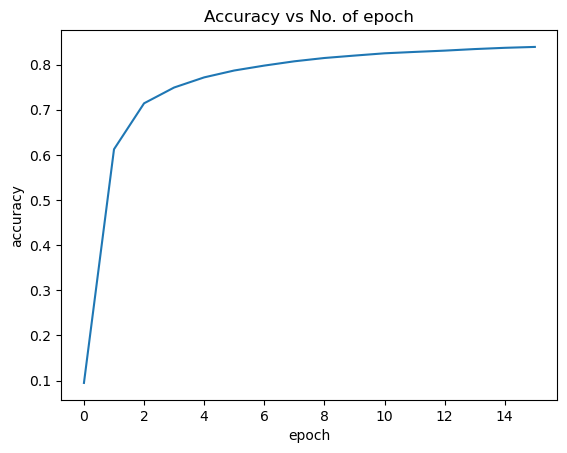

In [76]:
history = [result0] + history1 + history2+history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epoch')

In [78]:
#defining train data
test_dataset =  MNIST(root='data/',
                      train = False,
                      transform =transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


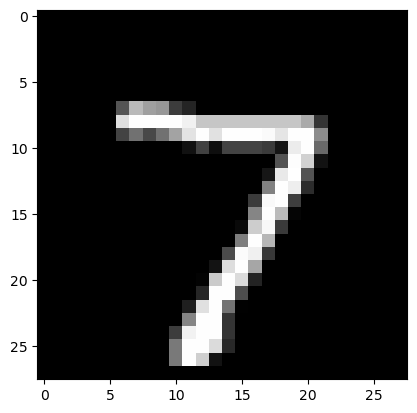

In [79]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [81]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

##`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.



Label: 0 , Predicted: 0


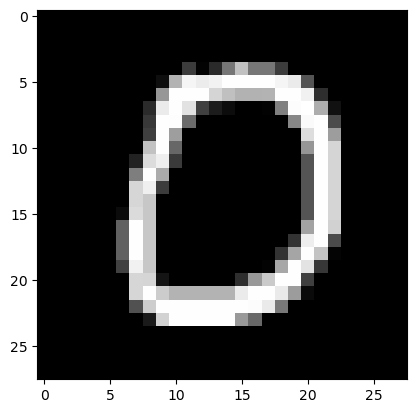

In [82]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 1 , Predicted: 1


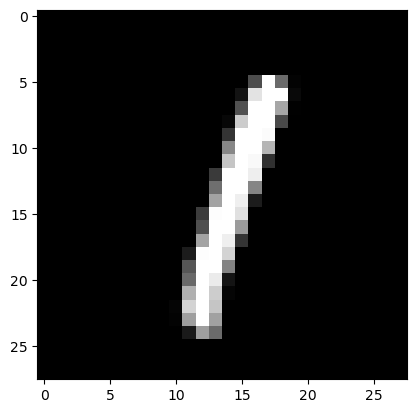

In [83]:
img, label = test_dataset[5]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 7 , Predicted: 4


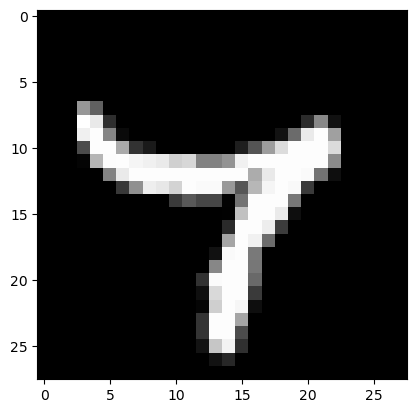

In [91]:
img, label = test_dataset[124]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

#As a final step lets have a look upon at the overall loss and accuarcy of the model

In [93]:
test_loader = DataLoader(test_dataset,batch_size=256)
result = evaluate(model,test_loader)
result

{'val_loss': 0.46738895773887634, 'val_acc': 0.8843749761581421}

## Saving up the weight and bias

In [94]:
torch.save(model.state_dict(),'mnist-logistic.path')

In [95]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0280, -0.0099,  0.0089,  ..., -0.0082, -0.0283,  0.0094],
                      [ 0.0034, -0.0237, -0.0175,  ..., -0.0329, -0.0145, -0.0190],
                      [ 0.0029, -0.0292,  0.0075,  ...,  0.0290, -0.0233,  0.0007],
                      ...,
                      [-0.0199,  0.0202,  0.0176,  ..., -0.0237, -0.0338, -0.0294],
                      [-0.0224,  0.0250, -0.0107,  ..., -0.0164, -0.0170, -0.0307],
                      [ 0.0179, -0.0173,  0.0249,  ..., -0.0136,  0.0257,  0.0196]])),
             ('linear.bias',
              tensor([-0.0532,  0.1167, -0.0113, -0.0494,  0.0273,  0.1260, -0.0091,  0.0812,
                      -0.1698, -0.0223]))])